<a href="https://colab.research.google.com/github/rajkumar-surana/hackathons/blob/main/rajunivai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn
import matplotlib
import torch
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [ ]:
!wget https://lead-files.nyc3.cdn.digitaloceanspaces.com/data/hackathon-1/Training%20Data.csv
!wget https://lead-files.nyc3.cdn.digitaloceanspaces.com/data/hackathon-1/Test%20Data.csv

--2021-04-16 11:02:59--  https://lead-files.nyc3.cdn.digitaloceanspaces.com/data/hackathon-1/Training%20Data.csv
Resolving lead-files.nyc3.cdn.digitaloceanspaces.com (lead-files.nyc3.cdn.digitaloceanspaces.com)... 205.185.216.10, 205.185.216.42
Connecting to lead-files.nyc3.cdn.digitaloceanspaces.com (lead-files.nyc3.cdn.digitaloceanspaces.com)|205.185.216.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20119550 (19M) [text/csv]
Saving to: ‘Training Data.csv’

Training Data.csv   100%[===================>]  19.19M   103MB/s    in 0.2s    

2021-04-16 11:02:59 (103 MB/s) - ‘Training Data.csv’ saved [20119550/20119550]

--2021-04-16 11:03:00--  https://lead-files.nyc3.cdn.digitaloceanspaces.com/data/hackathon-1/Test%20Data.csv
Resolving lead-files.nyc3.cdn.digitaloceanspaces.com (lead-files.nyc3.cdn.digitaloceanspaces.com)... 205.185.216.10, 205.185.216.42
Connecting to lead-files.nyc3.cdn.digitaloceanspaces.com (lead-files.nyc3.cdn.digitaloceanspaces.com)|20

In [ ]:
test=pd.read_csv("Test Data.csv", index_col=0)
train= pd.read_csv("Training Data.csv", index_col=0)

In [ ]:
train.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
Id,,,,,,,,,,,,
1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
train1=train.where(train['risk_flag']==0)
train2=train.where(train['risk_flag']==1)

In [ ]:
train2=train2.dropna()
train2=train2.sample(n=30996, replace=False, random_state=1)

In [ ]:
train1=train1.dropna()
train1=train1.sample(n=35000, replace=False, random_state=1)

In [ ]:
train1.shape

(35000, 12)

In [ ]:
train2.shape

(30996, 12)

In [ ]:
train=pd.concat([train1.iloc[:30996,:],train2])

In [ ]:
train.shape

(61992, 12)

In [ ]:
train=train.sample(frac = 1)

In [ ]:
train.tail()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
Id,,,,,,,,,,,,
1480,305527.0,60.0,14.0,single,rented,no,Artist,Chapra,Bihar,14.0,14.0,0.0
71964,7488205.0,60.0,9.0,single,rented,no,Technical_writer,Jhansi,Uttar_Pradesh,9.0,10.0,1.0
21505,9197013.0,71.0,9.0,single,rented,no,Physician,Suryapet,Telangana,6.0,11.0,0.0
3011,5028396.0,38.0,16.0,single,rented,no,Flight_attendant,"Khora,_Ghaziabad",Uttar_Pradesh,4.0,10.0,0.0
47469,8542806.0,31.0,12.0,married,rented,no,Civil_servant,Vadodara,Gujarat,6.0,13.0,1.0


In [ ]:
train['risk_flag'].value_counts()

0.0    30996
1.0    30996
Name: risk_flag, dtype: int64

In [ ]:
y_train= train.loc[:,'risk_flag']

In [ ]:
train=train.drop(labels=['risk_flag'],axis=1)

In [ ]:
y_train.value_counts()

0.0    30996
1.0    30996
Name: risk_flag, dtype: int64

In [ ]:
y_train.shape

(61992,)

In [ ]:
names=['married','house_ownership','car_ownership']
for name in names:
  uniks=list(train[name].unique())
  indexes=[i for i in range(len(uniks))]
  dik=dict(zip(uniks, indexes))
  train[name[0:4]]=train[name].map(dik)
  #here test now.
  uniks=list(test[name].unique())
  indexes=[i for i in range(len(uniks))]
  dik=dict(zip(uniks, indexes))
  test[name[0:4]]=test[name].map(dik)



In [ ]:
train=train.drop(labels=['city','state','profession'],axis=1)
test=test.drop(labels=['city','state','profession'],axis=1)
train=train.drop(labels=names,axis=1)
test=test.drop(labels=names,axis=1)

In [ ]:
train.head()

,income,age,experience,current_job_years,current_house_years,marr,hous,car_
Id,,,,,,,,
80864,2699320.0,27.0,1.0,1.0,10.0,0,0,0
180049,779324.0,45.0,20.0,4.0,10.0,0,0,0
6948,881669.0,57.0,20.0,12.0,14.0,0,0,0
222940,3420392.0,70.0,10.0,8.0,12.0,1,0,0
239993,7915772.0,21.0,13.0,9.0,10.0,0,0,0


In [ ]:
test.head()

,income,age,experience,current_job_years,current_house_years,marr,hous,car_
id,,,,,,,,
1,7393090,59,19,4,13,0,0,0
2,1215004,25,5,5,10,0,0,0
3,8901342,50,12,9,14,0,0,0
4,1944421,49,9,3,12,1,0,1
5,13429,25,18,13,11,0,0,1


In [ ]:
xtrain,xval,ytrain,yval= train_test_split(train,y_train,test_size=0.1, random_state=1)

In [ ]:
score_list = []
for i in range(1,25):
    rftest = RandomForestClassifier(n_estimators=i,criterion="gini",max_features='auto',random_state=42)
    rftest.fit(xtrain,ytrain)
    
    score_list.append(rftest.score(xval,yval))
    

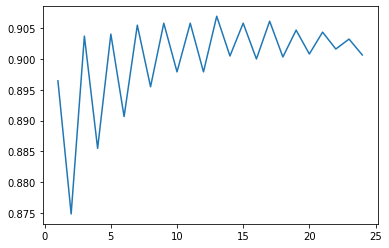

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,25),score_list)


In [ ]:
rftest = RandomForestClassifier(n_estimators=16,criterion="gini",random_state=42)
rftest.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=16,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
print (roc_auc_score(yval, rftest.predict(xval)))

0.9002222602438912


In [ ]:
y1=rftest.predict(test)

In [ ]:
'''
Index=range(1,28001)
dme={"id":Index,"risk_flag":y1}
ansme=pd.DataFrame(data=dme)
filename = 'rfBest.csv'

ansme.to_csv(filename,index=False)

print('Saved file: ' + filename)
'''

Saved file: rfBest.csv


In [ ]:
scores1=[]
scores2=[]
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
for i in range (1,10):
  neigh = KNeighborsClassifier(n_neighbors=i,weights='distance',p=1)
  neigh.fit(xtrain, ytrain)
  scores1.append(neigh.score(xval,yval))
  scores2.append(roc_auc_score(yval,neigh.predict(xval)))

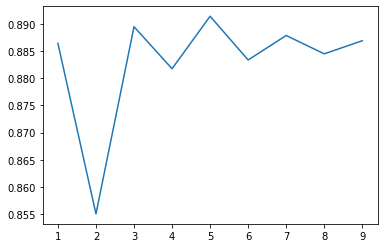

In [ ]:
plt.plot(range(1,10),scores1)

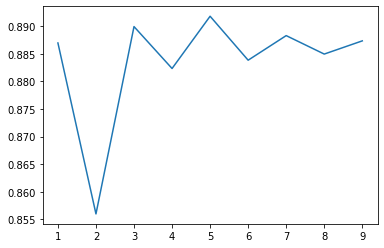

In [ ]:
plt.plot(range(1,10),scores2)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3,weights='distance',p=1)
neigh.fit(xtrain, ytrain)
y2=neigh.predict(test)

In [ ]:
'''
Index=range(1,28001)
dme={"id":Index,"risk_flag":y2}
ansme=pd.DataFrame(data=dme)
filename = 'knnBest.csv'

ansme.to_csv(filename,index=False)

print('Saved file: ' + filename)
'''

Saved file: knnBest.csv


In [ ]:
scores1=[]
scores2=[]
from sklearn.ensemble import GradientBoostingClassifier
for i in range(1,3):
  clf = GradientBoostingClassifier(n_estimators=i*1500, random_state=0, learning_rate=1,)
  clf.fit(xtrain, ytrain)
  scores2.append(roc_auc_score(yval,clf.predict(xval)))
  scores1.append(clf.score(xval,yval))


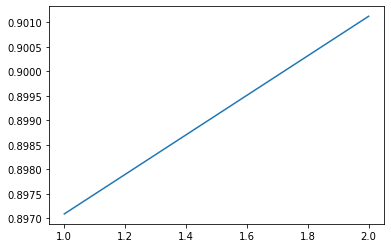

In [ ]:
plt.plot(range(1,3),scores1)

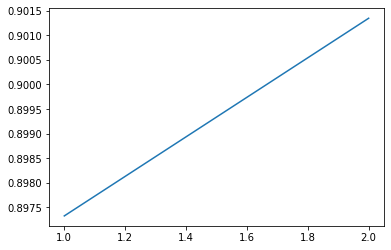

In [ ]:
plt.plot(range(1,3),scores2)

In [ ]:

clf.score(xval,yval)

0.9011210581498508

In [ ]:
y3=clf.predict(test)

In [ ]:
'''
Index=range(1,28001)
dme={"id":Index,"risk_flag":y3}
ansme=pd.DataFrame(data=dme)
filename = 'gardBest.csv'

ansme.to_csv(filename,index=False)

print('Saved file: ' + filename)'''

Saved file: gardBest.csv


In [ ]:
from sklearn.utils.extmath import weighted_mode

In [ ]:
size=28000
w1=[1]*size
w2=[1]*size
w3=[1]*size

x=[y1,y2,y3]
weights = [w1,w2,w3]
yo=weighted_mode(x, weights)


In [ ]:
print(yo)

(array([[0., 0., 0., ..., 0., 0., 1.]]), array([[3., 3., 3., ..., 3., 2., 3.]]))


In [ ]:
yo=yo[0][0][0].astype('int')

In [ ]:
yo

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
Index=range(1,28001)
dme={"id":Index,"risk_flag":yo}
ansme=pd.DataFrame(data=dme)
filename = 'final.csv'

ansme.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: final.csv
